In [4]:
import numpy as np
import polytope as pt
import matplotlib.pyplot as plt


class Obstacle():
    def __init__(self):
        self.obstacles = list()  #list of polytopes
        self.cart = pt.qhull(np.vstack([[0, 0], [1, 1], [2, 0], [1, -1]]))

    def add_obstacle(self, corners):  #2d array, or 2d list
        p1 = pt.qhull(np.asarray(corners))
        self.obstacles.append(p1)

    def update_cart_postion(self, corners):  #corners are x&y postion of the cart
        self.cart = pt.qhull(np.asarray(corners))

    def check_crash(self):  # Ture: cart hasn't crash into the obstacles.
        for o in self.obstacles:

            #check whether the corners of the cart are in the obstacle
            A = o.A
            b = o.b
            for point in pt.extreme(self.cart):
                if (np.all(A @ point - b <= 0)):
                    return False

            #check corners of the obstacle is in the car
            A = self.cart.A
            b = self.cart.b
            for point in pt.extreme(o):
                if (np.all(A @ point - b <= 0)):
                    return False
        return True

    def visualize(self):
        fig, ax = plt.subplots()

        for o in self.obstacles:
            o.plot(ax, color='black', linestyle='solid', linewidth=1)

        self.cart.plot(ax,
                       color='pink',
                       linestyle='solid',
                       linewidth=1,
                       alpha=0.5)

        ax.autoscale_view()
        ax.axis('equal')
        plt.show()


True


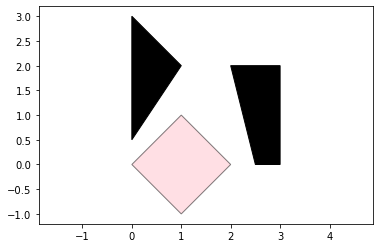

True


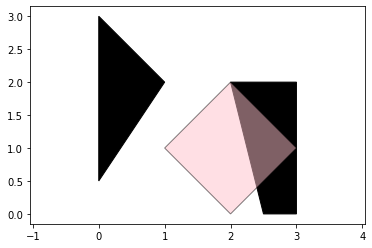

False


In [14]:
ob=Obstacle()
ob.update_cart_postion([[0,0],[1,1],[2,0],[1,-1]])
ob.add_obstacle([[2.5,0],[3,0],[2,2],[3,2]])

# p1=pt.qhull(np.asarray([[0,0],[1,0],[0,1],[1,1]]))
# ob.add_obstacle(pt.extreme(p1))
# p1=p1.translation([1,0.5])
# ob.add_obstacle(pt.extreme(p1))

cart=pt.qhull(np.asarray([[0,0],[1,1],[2,0],[1,-1]]))

ob.add_obstacle([[0,0.5],[0,3],[1,2]])

print(ob.check_crash())
ob.visualize()
print(ob.check_crash())
ob.update_cart_postion([[1,1],[2,2],[3,1],[2,0]])
ob.visualize()
print(ob.check_crash())